In [7]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size':15})

bolt_df = pd.read_csv('./data/BoltData.csv', names=('distance', 'err_distance', 'time', 'err_time'), header=0)
sum_x_y = np.sum((bolt_df.distance * bolt_df.time))
sum_x = np.sum(bolt_df.distance)
sum_y = np.sum(bolt_df.time)
sum_x_2 = np.sum((bolt_df.distance**2))



## Solution: Calculate $m$ and $c$


From the equations for $m$ and $c$ [in the worksheet](line-fit):

In [9]:
N = len(bolt_df.time) ## we also need the number of points

m = ((N * sum_x_y) - (sum_x*sum_y))/((N * sum_x_2) - (sum_x)**2)
c = (sum_y - m*sum_x)/N

print(m,c)

0.10015849092636359 -0.04800871322726992


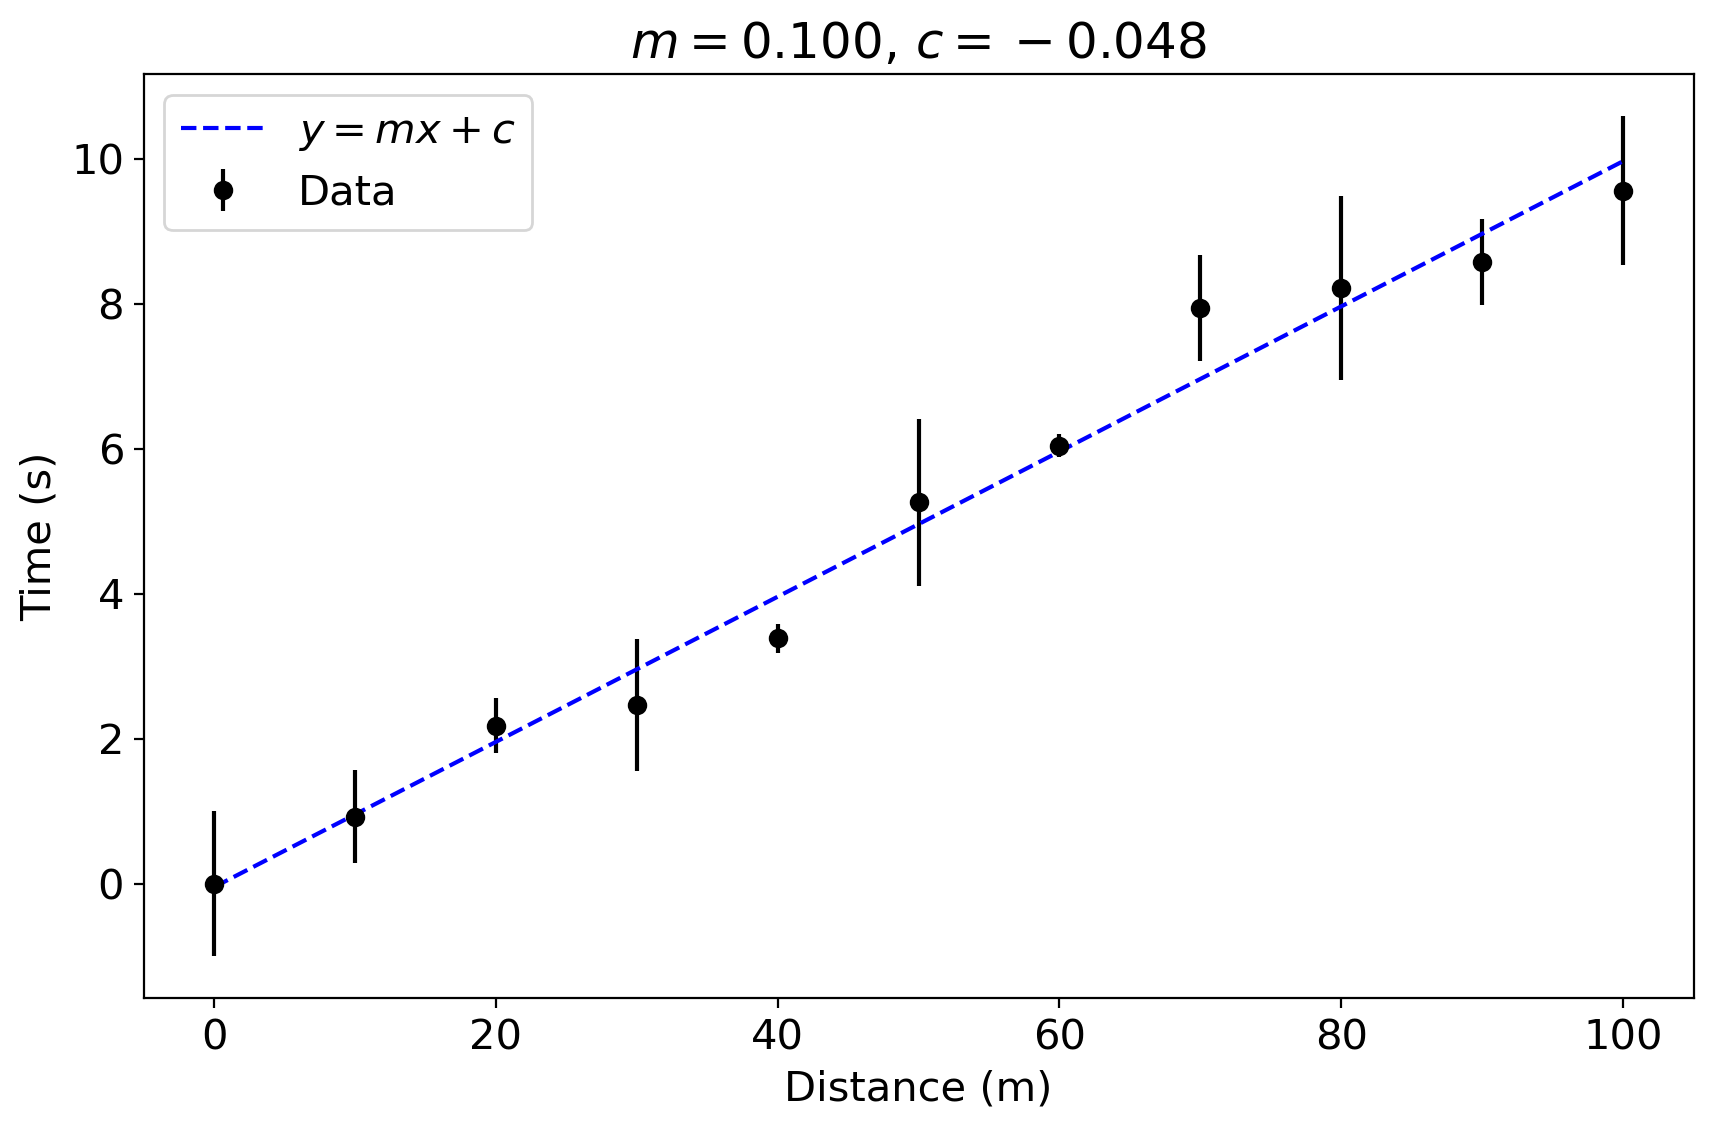

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(bolt_df.distance, bolt_df.time, yerr=bolt_df.err_time, color='k', marker='o', linestyle='None', label='Data')
ax.set_xlabel('Distance (m)')
ax.plot(bolt_df.distance, m*bolt_df.distance + c, color='blue', ls='--', label='$y = m x + c$')
ax.set_ylabel('Time (s)')
plt.legend()
title_string = "$m = {0:.3f}$, $c = {1:.3f}$".format(m, c)
ax.set_title(title_string)
plt.show()

[back to the worksheet](ex-calc-m-c)